# Marvel vs DC dataset analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport

sns.set(palette="pastel", style="ticks")

### 1. Investigation of the dataframe
[Marvel vs DC dataset]("https://www.kaggle.com/leonardopena/marvel-vs-dc") was obtained from [Kaggle]("https://www.kaggle.com/").

In [2]:
movie = pd.read_csv("/home/katerina/PycharmProjects/pandas_data/db.csv", encoding='latin-1')

In [62]:
# Number of rows and columns
movie.shape 

(39, 10)

In [63]:
movie

,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
1,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
2,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
3,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
4,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774
5,The Avengers,Marvel,8.0,69,143,2012,220000000,207438708,623357910,1518812988
6,Iron Man Three,Marvel,7.2,62,130,2013,200000000,174144585,409013994,1214811252
7,Thor: The Dark World,Marvel,6.9,54,112,2013,170000000,85737841,206362140,644783140
8,Captain America: The Winter Soldier,Marvel,7.7,70,136,2014,170000000,95023721,259766572,714421503
9,Guardians of the Galaxy,Marvel,8.0,76,121,2014,170000000,94320883,333176600,772776600


In [4]:
# Remove first `Unnamed` column 
movie = movie.loc[:,movie.columns!="Unnamed: 0"]

### 2. Types of variables

In [5]:
movie.dtypes

Original Title          object
Company                 object
Rate                   float64
Metascore                int64
Minutes                 object
Release                  int64
Budget                  object
Opening Weekend USA      int64
Gross USA                int64
Gross Worldwide          int64
dtype: object

In [6]:
# Change "Budget" and "Minutes" variables types
movie = movie.astype({"Budget": int, "Minutes": int}) 

In [7]:
movie.dtypes

Original Title          object
Company                 object
Rate                   float64
Metascore                int64
Minutes                  int64
Release                  int64
Budget                   int64
Opening Weekend USA      int64
Gross USA                int64
Gross Worldwide          int64
dtype: object

All variables have right type now.

### 3. Are there any NA?

In [8]:
movie.isna().sum()

Original Title         0
Company                0
Rate                   0
Metascore              0
Minutes                0
Release                0
Budget                 0
Opening Weekend USA    0
Gross USA              0
Gross Worldwide        0
dtype: int64

### 4. Basic statistics

In [9]:
movie.describe().round(2)

,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
count,39.00,39.00,39.00,39.00,3.900000e+01,3.900000e+01,3.900000e+01,3.900000e+01
mean,7.20,63.67,131.85,2013.79,1.841026e+08,1.151098e+08,3.232659e+08,8.275727e+08
std,1.07,13.86,18.44,4.29,6.441020e+07,6.866708e+07,1.807086e+08,5.332318e+08
min,3.30,27.00,81.00,2004.00,4.700000e+07,5.379365e+06,1.054712e+07,1.090331e+07
25%,6.90,56.50,120.50,2011.00,1.500000e+08,6.539093e+07,2.032217e+08,4.843193e+08
50%,7.30,67.00,130.00,2015.00,1.750000e+08,9.620234e+07,3.186041e+08,7.468469e+08
75%,7.85,72.50,143.00,2017.00,2.100000e+08,1.559225e+08,4.085492e+08,1.104658e+09
max,9.00,88.00,181.00,2019.00,3.560000e+08,3.571150e+08,8.583730e+08,2.797801e+09


In [64]:
# Number of DC and Marvel films
movie["Company"].value_counts()

Marvel    23
DC        16
Name: Company, dtype: int64

### 5. Plots
#### 5.1. Rate of movies
Marvel films rate seems to be greater than DS films.

Text(0.5, 1.0, 'Rate of movies')

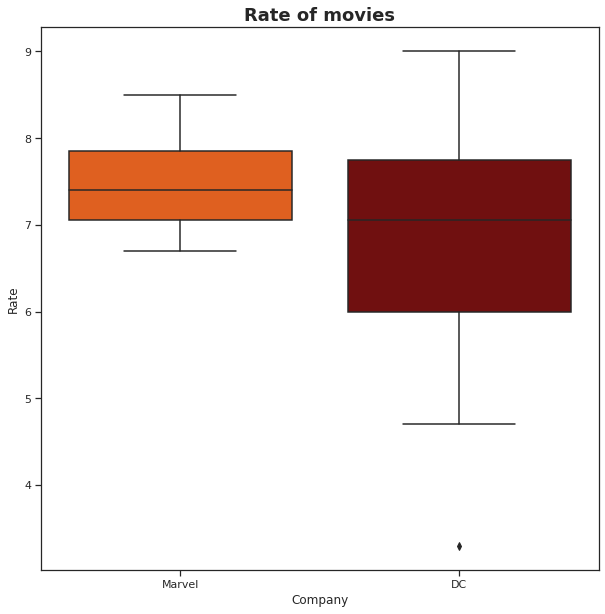

In [61]:
sns.boxplot(x="Company",y="Rate", data=movie, palette="gist_heat_r")
plt.title("Rate of movies", fontweight="bold", fontsize=18)

#### 5.2. Budget of movies

Text(0.5, 1.0, 'Budget of movies')

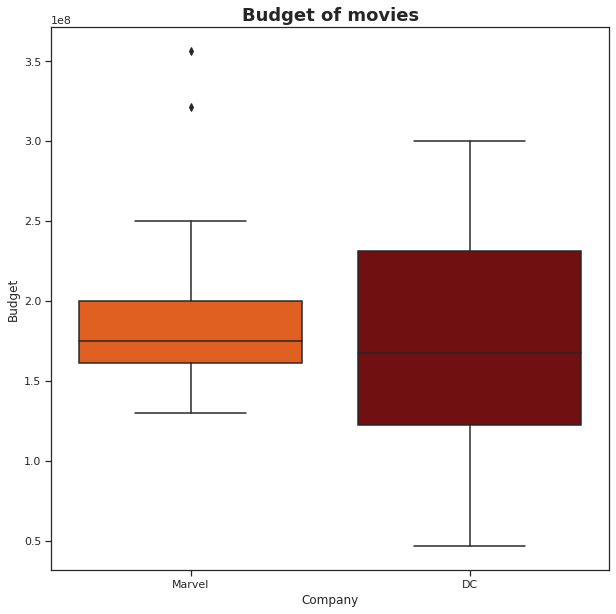

In [60]:
sns.boxplot(x="Company",y="Budget", data=movie, palette="gist_heat_r")
plt.title("Budget of movies", fontweight="bold", fontsize=18)

#### 5.3. Duration of films
DC films duration vary over a wider range comparing to Marvel films.

Text(0.5, 1.0, 'Duration of films')

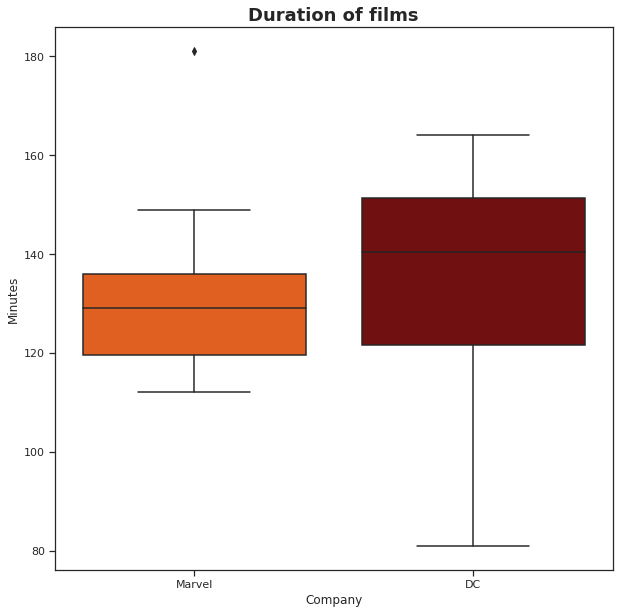

In [59]:
sns.boxplot(x="Company",y="Minutes", data=movie, palette="gist_heat_r")
plt.title("Duration of films", fontweight="bold", fontsize=18)

#### 5.4. Proceeds of movies after Opening Weekend USA

Text(0.5, 1.0, 'Proceeds of movies after Opening Weekend USA')

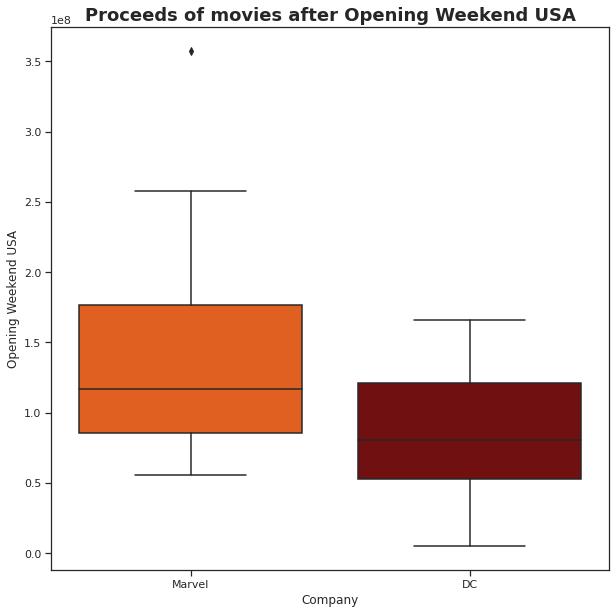

In [58]:
sns.boxplot(x="Company",y="Opening Weekend USA", data=movie, palette="gist_heat_r")
plt.title("Proceeds of movies after Opening Weekend USA", fontweight="bold", fontsize=18)

#### 5.5. Gross of movies in USA

Text(0.5, 1.0, 'Gross of movies in USA')

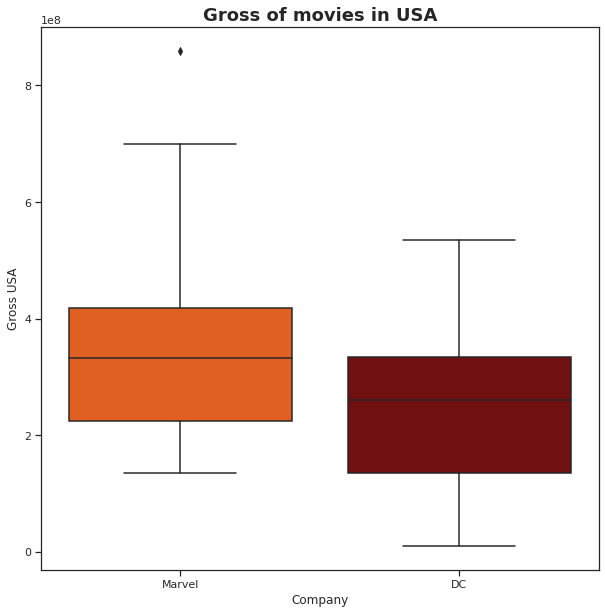

In [56]:
sns.boxplot(x="Company",y=movie.iloc[:, 8], data=movie, palette="gist_heat_r")
plt.title("Gross of movies in USA", fontweight="bold", fontsize=18)

#### 5.6. Worldwide gross of movies

Text(0.5, 1.0, 'Worldwide gross of movies')

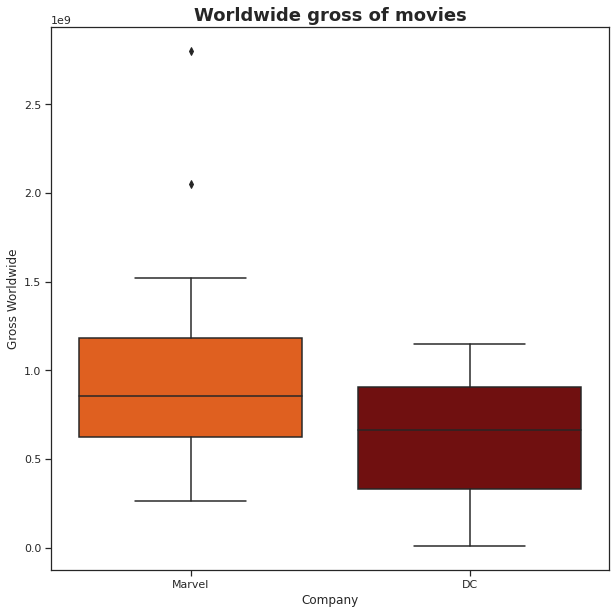

In [57]:
sns.boxplot(x="Company",y="Gross Worldwide", data=movie, palette="gist_heat_r")
plt.title("Worldwide gross of movies", fontweight="bold", fontsize=18)

Considering plots *5.4.*, *5.5.* and *5.6.*, it looks like Marvel movies gross is greater than DC movies.

#### 5.7. Number of movies released by Marvel and DC
Marvel releases more or equal number of movies per year, however DC started to release films earlier.

In [17]:
plot_data = movie.groupby(["Company"]).Release.value_counts().reset_index(name="Count").sort_values(by="Release")

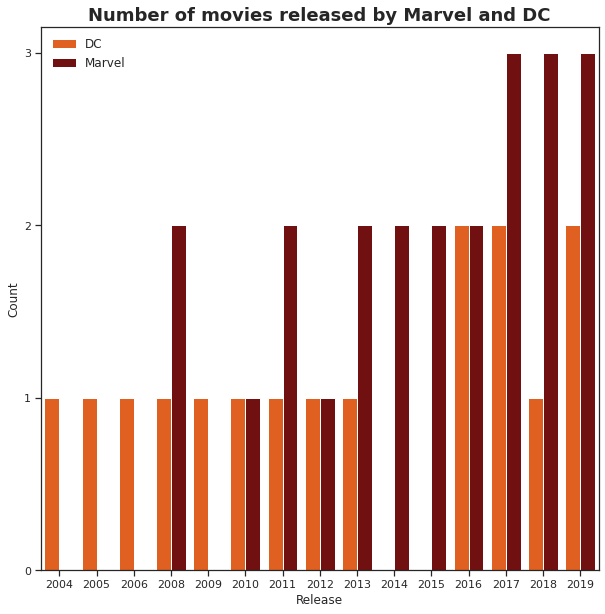

In [65]:
sns.barplot(x="Release", y="Count", data=plot_data, hue="Company", palette="gist_heat_r")
plt.title("Number of movies released by Marvel and DC", fontweight="bold", fontsize=18)
plt.yticks(np.arange(0,4,1.0))
plt.rcParams['figure.figsize'] = [10,10]
plt.legend(frameon=False, loc="upper left", prop={'size': 12})
plt.show()

#### 5.8. Correlation plot
**5.8.1.** Heatmap.
Strong correlation is observed between:
* `Gross USA` and `Opening Weekend USA`
* `Gross Worldwide` and `Gross USA`

It seems logical:)

Weak correlation is observed between:
* `Minutes` and `Release` (logical too)
* `Release` and `Budget` 

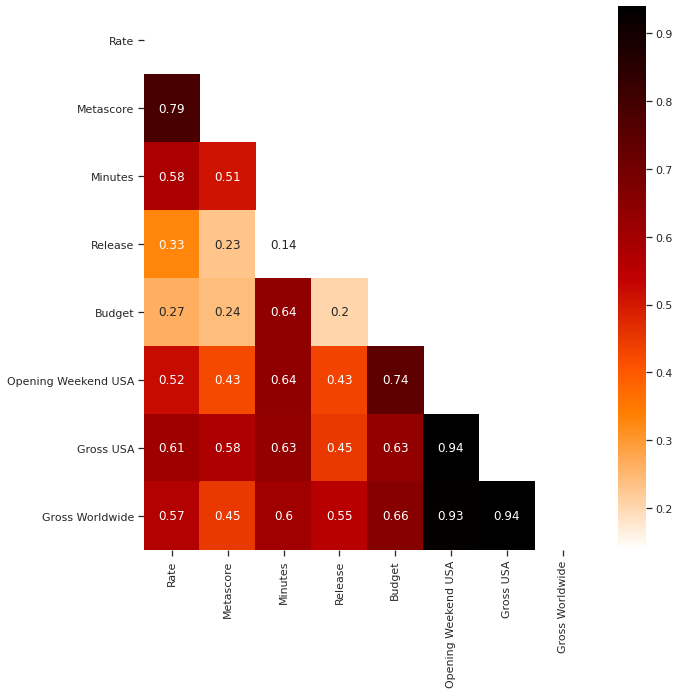

In [53]:
matrix = np.triu(movie.corr())
sns.heatmap(movie.corr(), annot = True, cmap="gist_heat_r", mask=matrix)

**5.8.2.** Pairplot

Another plot that demonstrates pairwise relationships in a dataset.

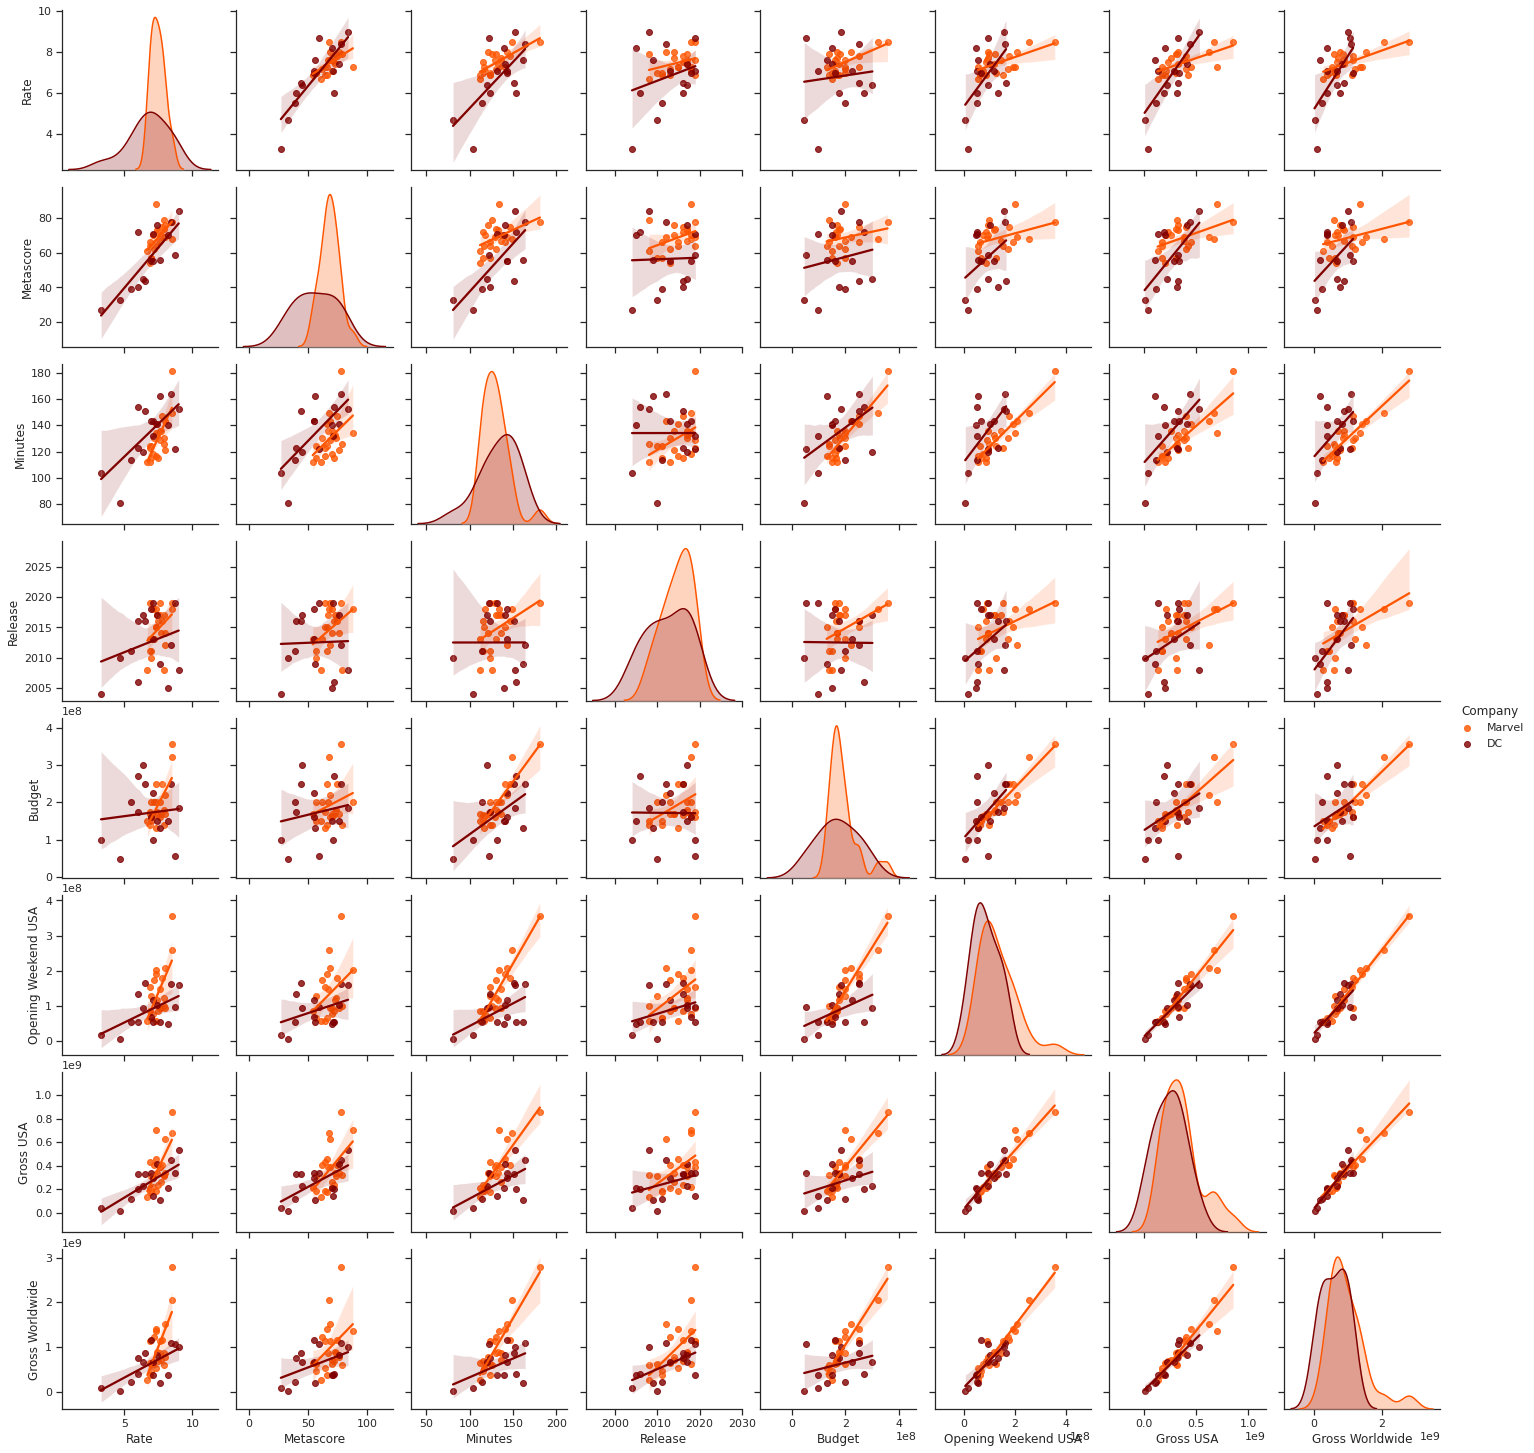

In [54]:
sns.pairplot(movie, kind="reg", hue="Company", palette="gist_heat_r")

### 6. EDA with pandas-profiling
I decided to compare self-made EDA and EDA provided by pandas-profoling.

In [21]:
profile = ProfileReport(movie, title="Pandas Profiling Report", 
                        missing_diagrams={
                            'heatmap':False,
                            'dendrogram':False,
                            'bar':False,
                            'matrix':False
                        })

In [22]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

As we can see, pandas-profing provides basic EDA analysis without any grouping variables. It could be usefull for initial analysis, however deep analysis should be done manually.